# ECBM E6040 Homework 2 - Programming Problem

In [2]:
from hw2b import load_data, LogisticRegression, HiddenLayer, MLP, test_mlp, myMLP
import theano
import theano.tensor as T
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
%env THEANO_FLAGS = device = gpu

env: THEANO_FLAGS=device = gpu


### Bullet 2: Comparison between _tanh_ and _softmax_

In [ ]:
# TODO
#Implement an MLP with 2 hidden layers
#First: activation function is "tanh"
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000, 
         batch_size=20, n_hidden_layers=2, n_hidden=200, verbose=True,activation_fun=T.tanh)

#Second: activation function is "softmax"
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000, 
         batch_size=20, n_hidden_layers=2, n_hidden=200, verbose=True,activation_fun=T.nnet.softmax)

**1.**Activation function is tanh

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=1000, batch_size=20, number of hidden layers=2, number of hidden units each layer=200, activation function=tanh

**Result:**

Optimization complete. Best validation score of 18.101093 % obtained at iteration 257088, with test performance 19.777095 %, i.e., Test Accuracy=80.222905%

**2.**Activation function is softmax

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=1000, batch_size=20, number of hidden layers=2, number of hidden units each layer=200, activation function=tanh

**Result:**

Optimization complete. Best validation score of 81.161202 % obtained at iteration 3662, with test performance 81.070995 %, i.e., Test Accuracy=18.929% 

**Discussion:**

From the results, we can find that softmax perform badly and it is not appropriate as activation function in hidden layers. Instead, tanh perform well and can act as activation function in hidden layers. Possible reasons: A softmax layer takes the activations and divides each of them by the sum of all activations, thereby forcing the outputs of the layer to take the form of probability distribution (sum to 1). This probability distribution peaks at certain neurons: In this case all other neurons will have a very low output. The parts of subsequent layers in your network that take these neuron activations as input are now effectively switched off.
This probability distribution is flat: You are just giving roughly equal numbers to all neurons in your next layer. Therefore, they don't have any interesting data to feed forward anymore.


### Bullet 3: Experiment with the number of hidden layers

In [ ]:
# TODO
for i in range(1,9):
    test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=500, 
         batch_size=20, n_hidden_layers=i, n_hidden=400, verbose=True,activation_fun=T.tanh)

**Results:**

$i=1$

Optimization complete. Best validation score of 18.674863 % obtained at iteration 395520, with test performance 20.449654 % i.e., Test Accuracy=79.550346%

$i=2$

Optimization complete. Best validation score of 18.101093 % obtained at iteration 257088, with test performance 19.573251 % i.e., Test Accuracy=80.426749%

$i=3$

Optimization complete. Best validation score of 17.418033 % obtained at iteration 715232, with test performance 19.161382 % i.e., Test Accuracy=80.838618%

$i=4$

Optimization complete. Best validation score of 15.806011 % obtained at iteration 1140416, with test performance 18.782553 % i.e., Test Accuracy=81.217447%

$i=5$

Optimization complete. Best validation score of 15.972678 % obtained at iteration 988992, with test performance 18.144965 % i.e., Test Accuracy=81.855035%

$i=6$

Optimization complete. Best validation score of 15.710383 % obtained at iteration 1114048, with test performance 17.985550 % i.e., Test Accuracy=82.01445%

$i=7$

Optimization complete. Best validation score of 15.560109 % obtained at iteration 1130528, with test performance 18.08570 % i.e., Test Accuracy=81.9143%

$i=8$

Optimization complete. Best validation score of 17.349727 % obtained at iteration 464736, with test performance 18.006710 % i.e., Test Accuracy=81.99392%


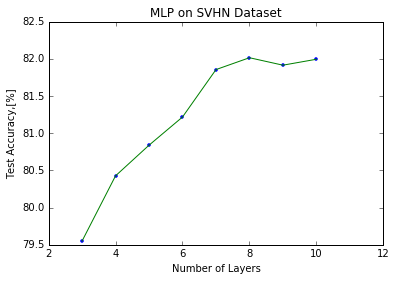

In [3]:
#Plot the result (reproducing Figure 1)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
test_accuracy = numpy.array([79.550346,80.426749,80.838618,81.217447,81.855035,82.01445,81.9143,81.99392])
axes.plot(range(3,11),test_accuracy,".")
axes.plot(range(3,11),test_accuracy,"-")
axes.set_title("MLP on SVHN Dataset")
axes.set_xlabel("Number of Layers")
axes.set_ylabel("Test Accuracy,[%]")
axes.set_xlim(2,12)
plt.show()

Document the choice of parameters, and discuss what you discover.

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=500, batch_size=20, number of hidden layers=$k$, number of hidden units each layer=400, activation function=tanh (where, $k = 1,2,\dots,8$)

**Discuss:**

I discovered from the results that, generally speaking, with the increase of the number of hidden layers(fixed other parameters), test accuracy(performance) goes up slowly and steadily. But, when the number of hidden layers is large enough, the growth rate of test accuracy becomes very small or even negative.

Possible reasons: the numebr of hidden layers represents the depth of MLP or the complexity of our model. Deeper model(i.e. MLP with more hidden layers) is more likely to approximate functions efficiently, learn and generalize correctly. It can avoid needing to make the model infeasibly large. From statstical perspective, Any time
we choose a specific machine learning algorithm, we are implicitly stating some set of prior beliefs we have about what kind of function the algorithm should learn. Choosing a deeper model encodes a very general belief that the function we want to learn should involve composition of several simpler functions  

### Bullet 4: Experiment with the number of hidden layers, but fix the total number of neurons

In [ ]:
# TODO
for i in range(1,9):
    test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=500,
             batch_size=20, n_hidden_layers=i, n_hidden=2400/i, verbose=True, activation_fun=T.tanh)

**Results:**

$i=1$

Optimization complete. Best validation score of 19.098361 % obtained at iteration 514176, with test performance 20.976172 %,i.e., Test Accuracy=79.023828%

$i=2$

Optimization complete. Best validation score of 17.650273 % obtained at iteration 273568, with test performance 19.973098 %,i.e., Test Accuracy=80.026902%

$i=3$

Optimization complete. Best validation score of 15.478142 % obtained at iteration 599872, with test performance 18.270561 %,i.e., Test Accuracy=81.729439%

$i=4$

Optimization complete. Best validation score of 14.972678 % obtained at iteration 1437056, with test performance 17.951576 %,i.e., Test Accuracy=82.048424%

$i=5$

Optimization complete. Best validation score of 17.546448 % obtained at iteration 775808, with test performance 18.094620 %,i.e., Test Accuracy=81.90538%

$i=6$

Optimization complete. Best validation score of 17.133880 % obtained at iteration 852736, with test performance 18.251345 %,i.e., Test Accuracy=81.748655%

$i=7$

Optimization complete. Best validation score of 16.535519 % obtained at iteration 1420576, with test performance 18.613221 %,i.e., Test Accuracy=81.386779%

$i=8$

Optimization complete. Best validation score of 18.316940 % obtained at iteration 549440, with test performance 19.757110 %,i.e., Test Accuracy=80.24289%

Plot the result (reproducing Figure 2)

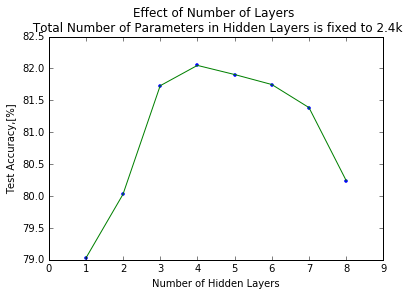

In [4]:
# TODO
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
test_accuracy = numpy.array([79.023828,80.026902,81.729439,82.048424,81.90538,81.748655,81.386779,80.24289])
axes.plot(range(1,9),test_accuracy,".")
axes.plot(range(1,9),test_accuracy,"-")
axes.set_title("Effect of Number of Layers \n Total Number of Parameters in Hidden Layers is fixed to 2.4k")
axes.set_xlabel("Number of Hidden Layers")
axes.set_ylabel("Test Accuracy,[%]")
axes.set_xlim(0,9)
plt.show()

Document the choice of parameters, and discuss what you discover.

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=500, batch_size=20,
number of hidden layers=$k$, number of hidden units each layer=$\lfloor2400/k\rfloor$, activation function=tanh (where, $k = 1,2,\dots,8$)

**Discuss:**

From the results we can find that given fixed total number of neurons in all hidden layers, with the increase of the number of hidden layers, test accuracy goes up first before hidden layers equal 4 and then goes down after that.

Possible reasons: given fixed total number of neurons in all hidden layers, when the number of hidden layers is small, say $1$ or $2$, the number of neurons each layers is very large which implies large model. Only incerasing the width of model without increasing its depth may end up with failing to learn and generalize in an efficient and correct way. Hence, we see the performance is not good. Naturally, when we achieve a balance between width and depth of the model, say the number of hidden layers is small equals $4$ or $5$, the test accuracy is higher. But as the number of hidden layers continues to increase(i.e., depth increases), the width goes on decreasing, smaller width may not be able to satisfies the need of deeper model, and thus the performace becomes worse. 

### Bullet 5: Experiment with the number of neurons in hidden layers, but fix the number of hidden layers

In [ ]:
# TODO
#one hidden layer with the number of neurons:100,300,500,700,900
for i in range(100,1000,200):
    test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,
             batch_size=20, n_hidden_layers=1, n_hidden=i, verbose=True, activation_fun=T.tanh)

#two hidden layers with the number of neurons:100,200,300,400,500    
for i in range(100,600,100):
    test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=1000,
             batch_size=20, n_hidden_layers=2, n_hidden=i, verbose=True, activation_fun=T.tanh)

**Results:**

The MLP contains 1 hidden layer:

$i=100$

Optimization complete. Best validation score of 19.086885 % obtained at iteration 695780, with test performance 20.280340 %,i.e., Test Accuracy=79.71966%

$i=300$

Optimization complete. Best validation score of 17.814208 % obtained at iteration 1157192, with test performance 19.640595 %,i.e., Test Accuracy=80.359405%

$i=500$

Optimization complete. Best validation score of 16.199454 % obtained at iteration 997192, with test performance  18.954308 %,i.e., Test Accuracy=81.045692%

$i=700$

Optimization complete. Best validation score of 1786885 % obtained at iteration 966768, with test performance 19.109527 %,i.e., Test Accuracy=80.890473%

$i=900$

Optimization complete. Best validation score of 19.057377 % obtained at iteration 546768, with test performance 21.213896 %,i.e., Test Accuracy=78.786104%

The MLP contains 2 hidden layers:

$i=100$

Optimization complete. Best validation score of 17.855191 % obtained at iteration 355968, with test performance 20.065334 %i.e., Test Accuracy=79.934665%

$i=200$

Optimization complete. Best validation score of 18.101093 % obtained at iteration 257088, with test performance 19.577095 %i.e., Test Accuracy=80.422905%

$i=300$

Optimization complete. Best validation score of 16.857923 % obtained at iteration 622944, with test performance 18.723005 %i.e., Test Accuracy=81.276995%

$i=400$

Optimization complete. Best validation score of 15.915301 % obtained at iteration 305383, with test performance 17.331795 %i.e., Test Accuracy=82.668205%

$i=500$

Optimization complete. Best validation score of 16.584699 % obtained at iteration 276864, with test performance 18.197310 %i.e., Test Accuracy=81.80269%


Plot the result (reproducing Figure 3)

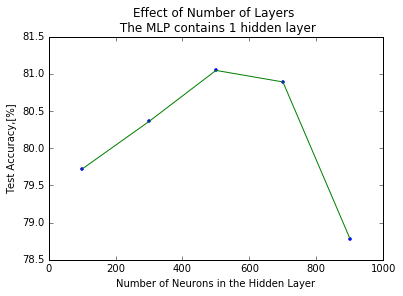

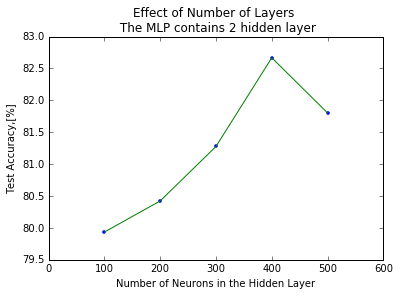

In [5]:
# TODO
# TODO
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
test_accuracy = numpy.array([79.71966,80.359405,81.045692,80.890473,78.786104])
axes.plot(range(100,1000,200),test_accuracy,".")
axes.plot(range(100,1000,200),test_accuracy,"-")
axes.set_title("Effect of Number of Layers \n The MLP contains 1 hidden layer")
axes.set_xlabel("Number of Neurons in the Hidden Layer")
axes.set_ylabel("Test Accuracy,[%]")
axes.set_xlim(0,1000)
plt.show()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
test_accuracy = numpy.array([79.934665,80.422905,81.276995,82.668205,81.80269])
axes.plot(range(100,600,100),test_accuracy,".")
axes.plot(range(100,600,100),test_accuracy,"-")
axes.set_title("Effect of Number of Layers \n The MLP contains 2 hidden layer")
axes.set_xlabel("Number of Neurons in the Hidden Layer")
axes.set_ylabel("Test Accuracy,[%]")
axes.set_xlim(0,600)
plt.show()

Document the choice of parameters, and discuss what you discover.

One hidden layer with the number of neurons:100,300,500,700,900

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=500, batch_size=20,
number of hidden layers=1, number of hidden units each layer=$k$, activation function=tanh (where, $k = 100,300,\dots,900$)

Two hidden layers with the number of neurons:100,200,300,400,500    

**Choice of parameters:**

learning rate=0.01, L1-norm's weight=0.00, L2-norm's weight=0.0001, maximal number of epochs=500, batch_size=20,
number of hidden layers=2, number of hidden units each layer=$k$, activation function=tanh (where, $k = 100,200,\dots,500$)


**Discuss:**
Given fixed depth(i.e., the number of hidden layers), with the increase of the number of neurons in each hidden layers, the test accuracy goes up when the number of neurons is small or before a certain amount of neurons after which the test accuracy goes down consistently. Meanwhile, we should also note from the results that deeper models tend to perform better. 

Possible reasons: with fixed depth of our model, the width is not appropriate whether overly small or large. Model with too small width may not be albe to approximate or learn a function accurately while model with too big width might cause model to be too large to work or learn normally. 
